In [233]:
import pandas as pd
import time
import os
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from collections import deque
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM, Dense ,Dropout, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard,EarlyStopping
from tensorflow.keras.models import Sequential


In [234]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [235]:
%cd /content/drive/MyDrive/DA/model

/content/drive/MyDrive/DA/model


In [236]:
df = pd.read_csv('GOOGL.csv')
df.head()

,Unnamed: 0,Date,open,high,low,close,adjclose,volume,Date.1,RSI,SMA,EMA,WMA,MOM
0,0,2022-05-03,2268.100098,2337.159912,2320.689941,2330.000000,2330.000000,146683,2022-05-02,279040,24305055,24096067,23722774,2719000
1,1,2022-05-02,2268.100098,2334.909912,2252.000000,2331.659912,2331.659912,1774500,2022-04-29,315088,24576955,24410526,24067493,2749000
2,2,2022-04-29,2334.689941,2358.399902,2276.290039,2282.189941,2282.189941,2131800,2022-04-28,307360,24851855,24646887,24341121,2317000
3,3,2022-04-28,2328.300049,2392.989990,2282.300049,2370.449951,2370.449951,2444200,2022-04-27,261703,25083555,24949973,24668495,3426150
4,4,2022-04-27,2289.389893,2344.840088,2254.729980,2285.889893,2285.889893,4591000,2022-04-26,343709,25426170,25406889,25128916,1905800


In [237]:
df.drop(df.columns[[0,8]], axis=1, inplace=True)

In [238]:
df = df.iloc[13:4013]

In [239]:
df.head()

,Date,open,high,low,close,adjclose,volume,RSI,SMA,EMA,WMA,MOM
13,2022-04-13,2560.000000,2606.679932,2554.820068,2597.879883,2597.879883,1396400,352674,27620150,27261693,27245435,2209500
14,2022-04-12,2632.000000,2632.000000,2535.780029,2554.290039,2554.290039,1635500,356787,27841100,27470958,27521998,1815400
15,2022-04-11,2636.469971,2641.850098,2573.370117,2576.469971,2576.469971,1844200,433286,28022640,27716794,27823442,1266500
16,2022-04-08,2711.669922,2713.399902,2659.310059,2665.750000,2665.750000,1256000,442982,28149290,27850148,28011185,638000
17,2022-04-07,2720.199951,2743.290039,2684.550049,2717.770020,2717.770020,1311700,508819,28213090,27994181,28195020,9500


In [240]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df.head(50)

,Date,open,high,low,close,adjclose,volume,RSI,SMA,EMA,WMA,MOM
0,2022-04-13,2560.000000,2606.679932,2554.820068,2597.879883,2597.879883,1396400,352674,27620150,27261693,27245435,2209500
1,2022-04-12,2632.000000,2632.000000,2535.780029,2554.290039,2554.290039,1635500,356787,27841100,27470958,27521998,1815400
2,2022-04-11,2636.469971,2641.850098,2573.370117,2576.469971,2576.469971,1844200,433286,28022640,27716794,27823442,1266500
3,2022-04-08,2711.669922,2713.399902,2659.310059,2665.750000,2665.750000,1256000,442982,28149290,27850148,28011185,638000
4,2022-04-07,2720.199951,2743.290039,2684.550049,2717.770020,2717.770020,1311700,508819,28213090,27994181,28195020,9500
5,2022-04-06,2775.000000,2787.209961,2710.340088,2730.959961,2730.959961,1623400,636884,28212140,28048443,28279045,1353500
6,2022-04-05,2857.379883,2859.810059,2807.649902,2811.820068,2811.820068,1070900,578721,28076790,27931697,28188680,839000
7,2022-04-04,2807.169922,2874.239990,2806.209961,2859.429932,2859.429932,1297100,556876,27992890,27900585,28174351,1215100
8,2022-04-01,2790.000000,2809.419922,2766.149902,2803.010010,2803.010010,1296700,646614,27871380,27900715,28169147,1780800
9,2022-03-31,2841.060059,2842.159912,2780.489990,2781.350098,2781.350098,1876200,661918,27693300,27787407,28038729,2345400


In [241]:
# Window size or the sequence length
N_STEPS = 45
# lookup step, 1 is the next day
LOOKUP_STEP = 5

# Whether to REF feature columns or not
RFE_1 = True
# Whether to PCA or not
PCA_1 = True

# whether to scale feature columns & output price as well
SCALE = True
scale_str = f"sc-{int(SCALE)}"
# Whether to shuffle the dataset
SHUFFLE = False
shuffle_str = f"sh-{int(SHUFFLE)}"
# TEST ratio size , 0.2 is 20 %
TEST_SIZE =0.2
# whether to split the training/testing set by date
SPLIT_BY_DATE = True
split_by_date_str = f"sbd-{int(SPLIT_BY_DATE)}"
# feature to use
# feature_columns = list(df.columns)
# feature_columns.remove('Symbol')
# feature_columns.remove('ngay')

# date now 
date_now = time.strftime("%Y-%m-%d")

# model parameters

N_LAYERS  = 4
#LSTM cell
CELL = LSTM
# 256 LSTM neurons
UNITS = 256
# DROPOUT
DROPOUT = 0.2
# Whether to use bidirectional RNNs
BIDIRECTIONAL = False

#  training parameters
# mean absolute error loss
# LOSS = 'mae'
# Huber loss
LOSS = 'huber_loss'
OPTIMIZER = 'rmsprop'
BATCH_SIZE = 32
EPOCHS = 1

# Telsa stock market
ticker = 'TSLA'
ticker_data_file = os.path.join('data', f"{ticker}_{date_now}.csv")
# model name to save ,making it as unique as possible based on parameters
model_name = f"{date_now}_{ticker}-{shuffle_str}-{scale_str}-{split_by_date_str}-\
{LOSS}-{OPTIMIZER}-{CELL.__name__}-seq-{N_STEPS}-step-{LOOKUP_STEP}-layers-{N_LAYERS}-units-{UNITS}"
if BIDIRECTIONAL:
    model_name += "-b"

In [242]:
    def shuffle_in_unison(a,b):
        # shuffle two arrays in the same way
        state = np.random.get_state()
        np.random.shuffle(a)
        np.random.set_state(state)
        np.random.shuffle(b)


In [243]:
n_select = 8

In [244]:
result = {}
result['df'] = df.copy()

In [245]:
feature_columns = df.columns.tolist()
feature_columns.remove('Date')

In [246]:
column_scaler = {}
for column in feature_columns:
  scaler = preprocessing.MinMaxScaler()
  df[column] = scaler.fit_transform(np.expand_dims(df[column].values, axis=1))
  column_scaler[column] = scaler
result['column_scaler'] = column_scaler

In [247]:
df['future'] = df['close'].shift(-LOOKUP_STEP)
df['future']

0       0.907316
1       0.935511
2       0.952112
3       0.932439
4       0.924886
          ...   
3995         NaN
3996         NaN
3997         NaN
3998         NaN
3999         NaN
Name: future, Length: 4000, dtype: float64

In [248]:
last_sequence = df[feature_columns].tail(LOOKUP_STEP)

In [249]:
result['last_sequence'] = last_sequence

In [250]:
df.dropna(inplace=True)

In [251]:
X = df.iloc[:, 1:26]
y = df['future']

In [252]:
estimator = SVR(kernel = 'linear')
selector = RFE(estimator, n_features_to_select = n_select, step=1)
selector.fit(X,y)
f = selector.get_support(1)
f

array([ 0,  1,  2,  4,  7,  8,  9, 11])

In [253]:
result['principal_Df'] = df[df.columns[f]]

In [254]:
result['principal_Df']

,Date,open,high,close,RSI,SMA,EMA,MOM
0,2022-04-13,0.839301,0.853510,0.860913,0.251421,0.927906,0.915425,0.604614
1,2022-04-12,0.864184,0.862253,0.845714,0.256664,0.935718,0.922832,0.496771
2,2022-04-11,0.865728,0.865654,0.853448,0.354189,0.942137,0.931533,0.346569
3,2022-04-08,0.891717,0.890360,0.884578,0.366550,0.946615,0.936253,0.174584
4,2022-04-07,0.894665,0.900681,0.902717,0.450482,0.948871,0.941351,0.002600
...,...,...,...,...,...,...,...,...
3990,2006-06-08,0.021662,0.021585,0.023710,0.543377,0.018697,0.018181,0.026118
3991,2006-06-07,0.022612,0.021687,0.022525,0.372903,0.018360,0.017705,0.011988
3992,2006-06-06,0.019730,0.020847,0.023132,0.367945,0.018205,0.017780,0.003980
3993,2006-06-05,0.019661,0.019369,0.020418,0.481357,0.018153,0.017888,0.011062


In [255]:
result['principal_Df'] = result['principal_Df'].iloc[:,1:]

In [256]:
lit_columns = result['principal_Df'].columns.tolist()
lit_columns

['open', 'high', 'close', 'RSI', 'SMA', 'EMA', 'MOM']

In [257]:
result['principal_Df'] = pd.concat([result['principal_Df'], result['last_sequence'][lit_columns]], axis=0)
x = result['principal_Df'].values
x

array([[0.83930128, 0.8535104 , 0.86091314, ..., 0.92790557, 0.9154253 ,
        0.60461362],
       [0.86418366, 0.86225319, 0.84571404, ..., 0.93571787, 0.92283211,
        0.49677102],
       [0.86572843, 0.86565434, 0.85344784, ..., 0.94213672, 0.93153332,
        0.34656852],
       ...,
       [0.02002442, 0.01929169, 0.01998218, ..., 0.01795548, 0.01803977,
        0.001441  ],
       [0.02110893, 0.02013505, 0.02162438, ..., 0.01793685, 0.01787533,
        0.03340548],
       [0.0201628 , 0.01963733, 0.02191059, ..., 0.01836849, 0.01789013,
        0.04249097]])

In [258]:
pca = PCA(n_components=6)
PCA_result = pca.fit_transform(x)
result['principal_Df'] = pd.DataFrame(data=PCA_result,
                                      columns=['pc1','pc2','pc3','pc4','pc5','pc6'])
result['principal_Df']

,pc1,pc2,pc3,pc4,pc5,pc6
0,1.523554,-0.288071,0.335875,-0.061344,0.013999,-0.002018
1,1.524583,-0.285075,0.226983,-0.064536,-0.014526,0.000302
2,1.520635,-0.190529,0.074494,-0.070086,-0.010237,0.000203
3,1.538941,-0.181529,-0.101456,-0.044685,-0.008464,-0.001775
4,1.536541,-0.100743,-0.275878,-0.038304,0.001367,-0.000529
...,...,...,...,...,...,...
3995,-0.458976,-0.168334,-0.013151,0.005419,0.000668,0.000138
3996,-0.458578,-0.124348,-0.013670,0.002950,-0.000549,0.000208
3997,-0.456027,-0.056809,-0.016863,0.001397,-0.000989,0.000351
3998,-0.452655,-0.125658,0.016021,0.004767,-0.000716,-0.000255


In [259]:
result['last_sequence'] = result['principal_Df'].iloc[-LOOKUP_STEP:,:]
result['last_sequence']

,pc1,pc2,pc3,pc4,pc5,pc6
3995,-0.458976,-0.168334,-0.013151,0.005419,0.000668,0.000138
3996,-0.458578,-0.124348,-0.013670,0.002950,-0.000549,0.000208
3997,-0.456027,-0.056809,-0.016863,0.001397,-0.000989,0.000351
3998,-0.452655,-0.125658,0.016021,0.004767,-0.000716,-0.000255
3999,-0.452523,-0.148037,0.025515,0.004769,0.000194,-0.000442


In [260]:
result['principal_Df'] = result['principal_Df'].iloc[:-LOOKUP_STEP,:]
result['principal_Df']['future'] = df['future']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [261]:
result['principal_Df']['Date'] = df['Date']
result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


{'column_scaler': {'EMA': MinMaxScaler(),
  'MOM': MinMaxScaler(),
  'RSI': MinMaxScaler(),
  'SMA': MinMaxScaler(),
  'WMA': MinMaxScaler(),
  'adjclose': MinMaxScaler(),
  'close': MinMaxScaler(),
  'high': MinMaxScaler(),
  'low': MinMaxScaler(),
  'open': MinMaxScaler(),
  'volume': MinMaxScaler()},
 'df':             Date         open         high          low        close  \
 0     2022-04-13  2560.000000  2606.679932  2554.820068  2597.879883   
 1     2022-04-12  2632.000000  2632.000000  2535.780029  2554.290039   
 2     2022-04-11  2636.469971  2641.850098  2573.370117  2576.469971   
 3     2022-04-08  2711.669922  2713.399902  2659.310059  2665.750000   
 4     2022-04-07  2720.199951  2743.290039  2684.550049  2717.770020   
 ...          ...          ...          ...          ...          ...   
 3995  2006-06-01   186.956955   191.686691   185.985992   191.501495   
 3996  2006-05-31   187.087082   189.314316   183.573578   186.096100   
 3997  2006-05-30   189.329330  

In [262]:
def FE_and_RFE(df , scale = SCALE ,RFE_1 = RFE_1,  n_select = 8, PCA_1 = PCA_1,
               shuffle = True, lookup_steps = LOOKUP_STEP):
    
    # this will contain all the elements we want to return from this function
    result = {}
    # we will alse return the original df itself
    result['df'] = df.copy()
    
    # create feature columns
    feature_columns = df.columns.tolist()
    feature_columns.remove('Date')
    # feature_columns.remove('Symbol')  # remove for scaler mothod is just for numerical
    
    if scale:
        column_scaler = {}
        # scale the data (prices) from 0 to 1
        for column in feature_columns:
            scaler = preprocessing.MinMaxScaler()
            df[column] = scaler.fit_transform(np.expand_dims(df[column].values, axis =1))
            column_scaler[column] = scaler
            
        # add the MinMaxScale r intances to the result returned
        result['column_scaler'] = column_scaler
        
    # last 'lookup_step' columns contains NaN in future column

    # add the target column (label) by shifting by 'lookup_step'
    df['future'] = df['close'].shift(-lookup_steps)
    
    # get last sequence 
    last_sequence = df[feature_columns].tail(lookup_steps)
    
    result['last_sequence'] = last_sequence
#         # drop NaNs
    df.dropna(inplace =True)
    ###############################
    X = df.iloc[:, 1:26]
    y = df['future']

    #X_train, X_test , y_train , y_test = train_test_split(X, y ,test_size =0.2,
                                                  #  random_state = 42)

    # def RFE():
    #After the feature extension above, we explore the most effective i features by using the Recursive Feature Elimination
# (RFE) algorithm [6]. We estimate all the features by two attributes, coefficient, and feature importance.
        #We also limit the features that remove from the pool by one, which means we will remove one feature at each step and 
        # retain all the relevant features. Then the output of the RFE block will be the input of the next step, which refers to PCA.'''
    if RFE_1:
        estimator = SVR(kernel = 'linear')
        selector = RFE(estimator , n_features_to_select = n_select, step = 1)

        # fit RFE
        selector.fit(X,y)

        # print(selector.support_)
        # print(selector.ranking_)
        f = selector.get_support(1)
        result['principal_Df'] = df[df.columns[f]]     # create df from selected columns
        # result['principal_Df']['future'] = df['future']
    
        result['principal_Df'] = result['principal_Df'].iloc[:, 1:]

        # create columns of result['principal_Df]
        lit_columns = result['principal_Df'].columns.tolist()

    result['principal_Df'] = pd.concat([result['principal_Df'], result['last_sequence'][lit_columns]], axis = 0)
     
    x = result['principal_Df'].values
    if PCA_1:
        pca = PCA(n_components = 6)
        PCA_result = pca.fit_transform(x)
        result['principal_Df'] = pd.DataFrame(data = PCA_result,
                                  columns = ['pc1','pc2','pc3','pc4','pc5','pc6'])

        # add result['last_sequence']

        result['last_sequence'] = result['principal_Df'].iloc[-LOOKUP_STEP: , :]
        # add new result_principal_Df

        result['principal_Df']  = result['principal_Df'].iloc[:-LOOKUP_STEP , :]

        result['principal_Df']['future']= df['future'] # add column
    
    if 'Date' not in result['principal_Df'].columns:
        result['principal_Df']['Date'] = df['Date']
    
    return result
    # X là dataframe đã được FeatureExpand & RFE

In [263]:
result_1 = FE_and_RFE(df)
result_1['last_sequence']

,pc1,pc2,pc3,pc4,pc5,pc6
3990,-0.445699,0.063573,0.004702,0.000193,0.000667,0.000167
3991,-0.453480,-0.106898,-0.005838,0.005516,-0.001220,0.000116
3992,-0.456082,-0.111958,-0.013502,0.004749,0.001254,0.000484
3993,-0.453349,0.001452,-0.008507,-0.000290,-0.000278,0.000436
3994,-0.458426,-0.171240,-0.012216,0.006332,-0.001389,-0.000087


In [264]:
n_steps = 50
lookup_steps =5
test_size = 0.2

In [265]:

def load_data(result_1 , n_steps = 50, shuffle = False, lookup_steps =5,scale =True,
             split_by_date = True, test_size = 0.2):
    
    # create dict that contain all the elements we want to return from this function
    result = {}
    # we wil also return the original dataframe itself
    # result['df'] = result_1['after_RFE'].copy()
    
    
    
    ######### PART1: MinMax_Scaler 
    
    feature_columns = result_1['principal_Df'].columns.tolist()
    # feature_columns.remove('future')
    feature_columns.remove('Date') #  remove target variable
    feature_columns.remove('future')
    # create df contain feature_columns
    result['feature_columns'] = feature_columns
    
    
    # create for final_data
    lit_columns = result_1['df'].columns.tolist()
    
    result['df'] = result_1['df'][lit_columns + ['Date']]
    ##################################### PART2: 
    
    # add date as a column
    if 'date' not in result_1['principal_Df'].columns:
        result_1['principal_Df']['date'] = result_1['principal_Df'].index
    
    # get last sequence 
    last_sequence = np.array(result_1['last_sequence'])
    
    # drop NaNs
    result_1['principal_Df'].dropna(inplace =True)
    
    
    sequence_data = []
    sequences = deque(maxlen = n_steps)
    
    for entry, target in zip(result_1['principal_Df'][feature_columns + ['date']].values,
                            result_1['principal_Df']['future'].values):
        sequences.append(entry)
        if len(sequences) == n_steps:
            sequence_data.append([np.array(sequences), target])
     # get the last sequence by appending the last `n_step` sequence with `lookup_step` sequence
    # for instance, if n_steps=50 and lookup_step=10, last_sequence should be of 60 (that is 50+10) length
    # this last_sequence will be used to predict future stock prices that are not available in the dataset
    
    last_sequence = list([s[:len(feature_columns)] for s in sequences]) + list(last_sequence)
    last_sequence = np.array(last_sequence).astype(np.float32)
    
    # add to result
    result['last_sequence']  = last_sequence
    
    # Contruct the X's and y's
    X, y = [], []
    for seq , target in sequence_data:
        X.append(seq)
        y.append(target)
        
    # convert to numpy array
    X = np.array(X)
    y = np.array(y)
    
    # result['X'] = X
    
    if split_by_date:
        # # split the dataset into training & testing sets by date (not randomly splitting)
        train_samples = int((1 - test_size) * len(X))
        
        result['X_train'] = X[:train_samples]
        result['y_train'] = y[:train_samples]
        result['X_test'] = X[train_samples:]
        result['y_test'] = y[train_samples:]
        if shuffle:
            # shuffle the datasets for training (if shuffle parameter is set)
            shuffle_in_unison(result['X_train'], result['y_train'])
            shuffle_in_unison(result['X_test'], result['y_test'])
    else:
        # split the dataset randomly
        result['X_train'], result['X_test'], result['y_train'], result['y_test'] = train_test_split(X, y,
                                               test_size = test_size, shuffle = shuffle)
    # get the list of test set dates
    dates = result['X_test'][:, -1, -1]
    # retrieve test features from the original fdf
    result['test_df'] = result['df'].loc[dates]
    # remove duplicated dates in the testing df
    result['test_df'] = result['test_df'][~result['test_df'].index.duplicated(keep = 'first')]
    # remove dates from the training/tesing set && convert to float 32
    result['X_train'] = result['X_train'][:,:,:len(feature_columns)].astype(np.float32)
    result['X_test'] = result['X_test'][:,:,:len(feature_columns)].astype(np.float32)
    
    return result


In [266]:
# result = {}
# feature_columns = result_1['principal_Df'].columns.tolist()
# feature_columns.remove('Date')
# feature_columns.remove('future')
# result['feature_columns'] = feature_columns

In [267]:
# feature_columns

In [268]:
# lit_columns = result_1['df'].columns.tolist()
# result['df'] = result_1['df'][lit_columns + ['Date']]

In [269]:
# result_1['principal_Df']['date'] = result_1['principal_Df'].index

In [270]:
# last_sequence = np.array(result_1['last_sequence'])
# last_sequence

In [271]:
# result_1['principal_Df'].dropna(inplace=True)

In [272]:
# sequence_data = []
# sequences = deque(maxlen = n_steps)

In [273]:
# for entry, target in zip(result_1['principal_Df'][feature_columns + ['date']].values,
#                          result_1['principal_Df']['future'].values):
#   sequences.append(entry)
#   if len(sequences) == n_steps:
#     sequence_data.append([np.array(sequences), target])
# sequences

In [274]:
# print(len(sequences))
# print(len(sequence_data))

In [275]:
# last_sequence = list([s[:len(feature_columns)] for s in sequences]) + list(last_sequence)
# last_sequence = np.array(last_sequence).astype(np.float32)
# last_sequence

In [276]:
# result['last_sequence'] = last_sequence

In [277]:
# X, y = [], []
# for seq, target in sequence_data:
#   X.append(seq)
#   y.append(target)
# X = np.array(X)
# y = np.array(y)

In [278]:
# train_samples = int((1 - test_size) * len(X))
# result['X_train'] = X[:train_samples]
# result['y_train'] = y[:train_samples]
# result['X_test'] = X[train_samples:]
# result['y_test'] = y[train_samples:]

In [279]:
# dates = result['X_test'][:,-1,-1]

In [280]:
# result['test_df'] = result['df'].loc[dates]

In [281]:
# result['test_df'] = result['test_df'][~result['test_df'].index.duplicated(keep='first')]

In [282]:
# print(result['X_train'].shape) # (3152, 50, 7)
# print(result['X_train'][:,:,:1].shape)

In [283]:
# result['X_train'] = result['X_train'][:,:,:len(feature_columns)].astype(np.float32)
# result['X_test'] = result['X_test'][:,:,:len(feature_columns)].astype(np.float32)

In [284]:
data = load_data(result_1  , N_STEPS ,scale = SCALE, split_by_date = SPLIT_BY_DATE,
                shuffle = SHUFFLE , lookup_steps = LOOKUP_STEP,test_size =TEST_SIZE)
data['df']

,Date,open,high,low,close,adjclose,volume,RSI,SMA,EMA,WMA,MOM,future,Date
0,2022-04-13,0.839301,0.853510,0.851742,0.860913,0.860913,0.020207,0.251421,0.927906,0.915425,0.913172,0.604614,0.907316,2022-04-13
1,2022-04-12,0.864184,0.862253,0.845071,0.845714,0.845714,0.025398,0.256664,0.935718,0.922832,0.922937,0.496771,0.935511,2022-04-12
2,2022-04-11,0.865728,0.865654,0.858241,0.853448,0.853448,0.029929,0.354189,0.942137,0.931533,0.933580,0.346569,0.952112,2022-04-11
3,2022-04-08,0.891717,0.890360,0.888351,0.884578,0.884578,0.017159,0.366550,0.946615,0.936253,0.940208,0.174584,0.932439,2022-04-08
4,2022-04-07,0.894665,0.900681,0.897194,0.902717,0.902717,0.018369,0.450482,0.948871,0.941351,0.946699,0.002600,0.924886,2022-04-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,2006-06-08,0.021662,0.021585,0.023022,0.023710,0.023710,0.439245,0.543377,0.018697,0.018181,0.018688,0.026118,0.021846,2006-06-08
3991,2006-06-07,0.022612,0.021687,0.024409,0.022525,0.022525,0.376428,0.372903,0.018360,0.017705,0.018199,0.011988,0.019961,2006-06-07
3992,2006-06-06,0.019730,0.020847,0.022621,0.023132,0.023132,0.434920,0.367945,0.018205,0.017780,0.018218,0.003980,0.019982,2006-06-06
3993,2006-06-05,0.019661,0.019369,0.022244,0.020418,0.020418,0.230997,0.481357,0.018153,0.017888,0.018240,0.011062,0.021624,2006-06-05


In [285]:
units = 256
cell = LSTM
dropout= 0.2
loss ='mean_absolute_error'
optimizer = 'adam'
n_layers = N_LAYERS
bidirectional = False

In [286]:
#model = create_model(N_STEPS, len(data['feature_columns']), loss = LOSS, units = UNITS, cell=CELL, n_layers = N_LAYERS,
                    #dropout =DROPOUT, optimizer = OPTIMIZER, bidirectional = BIDIRECTIONAL)
sequence_length = N_STEPS
n_features = len(data['feature_columns'])

In [287]:
model = Sequential()
for i in range(n_layers):
  if i == 0:
    batch_input_shape = (None, sequence_length, n_features)
    model.add(cell(units, return_sequences=True))
  elif i == n_layers - 1:
    model.add(cell(units, return_sequences=False))
  else:
    model.add(cell(units, return_sequences=True))
  model.add(Dropout(dropout))
model.add(Dense(1, activation='linear'))
model.compile(loss=loss, metrics=['mean_absolute_error'], optimizer=optimizer)

In [288]:
def create_model(seqluence_length ,  n_features, units = 256, cell = LSTM,
                n_layers = N_LAYERS,dropout= 0.2, loss ='mean_absolute_error',
                optimizer = 'adam', bidirectional = False):
    model = Sequential()
    for i in range(n_layers):
        if i ==0:
            # first layer
            if bidirectional:
                model.add(Bidirectional(cell(units, return_sequences = True),
            batch_input_shape = (None, sequence_length, n_features)))
            else:
                model.add(cell(units, return_sequences = True,
                batch_input_shape = (None, sequence_length, n_features)))
        elif i == n_layers - 1:
            # last layer
            if bidirectional:
                model.add(Bidirectional(cell(units, return_sequences = False)))
            else:
                model.add(cell(units, return_sequences =False))
        else:
            # hidden layers
            if bidirectional:
                model.add(Bidirectional(cell(units, return_sequences = True)))
            else:
                model.add(cell(units, return_sequences =True))
        # add dropout after each layer
        model.add(Dropout(dropout))
    model.add(Dense(1, activation = 'linear'))
    model.compile(loss = loss, metrics = ['mean_absolute_error'], optimizer = optimizer)
    return model

In [289]:
if not os.path.isdir('results'):
  os.mkdir('results')
if not os.path.isdir('logs'):
  os.mkdir('logs')
if not os.path.isdir('data'):
  os.mkdir('data')

data['df'].to_csv(ticker_data_file)

model = create_model(N_STEPS, len(data['feature_columns']), loss = LOSS, units = UNITS, cell=CELL, n_layers = N_LAYERS,
                    dropout =DROPOUT, optimizer = OPTIMIZER, bidirectional = BIDIRECTIONAL)

In [290]:
checkpointer = ModelCheckpoint(os.path.join('results', model_name + ".h5"), monitor='val_loss',mode='min',save_weights_only=True, verbose=1)
tensorboard = TensorBoard(log_dir=os.path.join('logs', model_name))
history = model.fit(data['X_train'], data['y_train'],
                    batch_size=64,
                    epochs=35,
                    validation_data = (data['X_test'], data['y_test']),
                    callbacks=[checkpointer, tensorboard],
                    verbose=1)

Epoch 1/35
50/50 [==============================] - ETA: 0s - loss: 0.0116 - mean_absolute_error: 0.0803
Epoch 1: saving model to results/2022-05-04_TSLA-sh-0-sc-1-sbd-1-huber_loss-rmsprop-LSTM-seq-45-step-5-layers-4-units-256.h5
50/50 [==============================] - 15s 134ms/step - loss: 0.0116 - mean_absolute_error: 0.0803 - val_loss: 0.0016 - val_mean_absolute_error: 0.0566
Epoch 2/35
50/50 [==============================] - ETA: 0s - loss: 0.0044 - mean_absolute_error: 0.0597
Epoch 2: saving model to results/2022-05-04_TSLA-sh-0-sc-1-sbd-1-huber_loss-rmsprop-LSTM-seq-45-step-5-layers-4-units-256.h5
50/50 [==============================] - 4s 77ms/step - loss: 0.0044 - mean_absolute_error: 0.0597 - val_loss: 0.0028 - val_mean_absolute_error: 0.0743
Epoch 3/35
50/50 [==============================] - ETA: 0s - loss: 0.0026 - mean_absolute_error: 0.0427
Epoch 3: saving model to results/2022-05-04_TSLA-sh-0-sc-1-sbd-1-huber_loss-rmsprop-LSTM-seq-45-step-5-layers-4-units-256.h5
50/5

In [291]:
X_test = data['X_test']
y_test = data['y_test']
y_pred = model.predict(X_test)

In [292]:
y_test = np.squeeze(result_1['column_scaler']['close'].inverse_transform(np.expand_dims(y_test, axis=0)))
y_pred = np.squeeze(result_1['column_scaler']['close'].inverse_transform(y_pred))

In [293]:
test_df = data['test_df']

In [294]:
test_df[f"close_{LOOKUP_STEP}"] = y_pred
test_df[f"true_close_{LOOKUP_STEP}"] = y_test

In [295]:
test_df.sort_index(inplace=True)

In [296]:
final_df = test_df

In [297]:
buy_profit = lambda current, pred_future, true_future: true_future - current if pred_future > current else 0
sell_profit = lambda current, pred_future, true_future: current - true_future if pred_future < current else 0

In [298]:
final_df['close']

3200.0    0.031204
3201.0    0.031834
3202.0    0.032697
3203.0    0.033033
3204.0    0.031396
            ...   
3985.0    0.023308
3986.0    0.022155
3987.0    0.022527
3988.0    0.021658
3989.0    0.022535
Name: close, Length: 790, dtype: float64

In [299]:
final_df[f"close_{LOOKUP_STEP}"]

3200.0    0.063928
3201.0    0.063544
3202.0    0.063138
3203.0    0.062454
3204.0    0.061550
            ...   
3985.0    0.052646
3986.0    0.052129
3987.0    0.051793
3988.0    0.051551
3989.0    0.051438
Name: close_5, Length: 790, dtype: float32

In [300]:
final_df[f"true_close_{LOOKUP_STEP}"]

3200.0    0.029711
3201.0    0.029748
3202.0    0.030144
3203.0    0.030158
3204.0    0.032314
            ...   
3985.0    0.023710
3986.0    0.022525
3987.0    0.023132
3988.0    0.020418
3989.0    0.021291
Name: true_close_5, Length: 790, dtype: float64

In [301]:
list(map(buy_profit, 
         final_df['close'],
         final_df[f"close_{LOOKUP_STEP}"],
         final_df[f"true_close_{LOOKUP_STEP}"]))

[-0.0014921196776101625,
 -0.0020854730409424344,
 -0.0025531826776997307,
 -0.0028742911185203196,
 0.0009179573759656168,
 0.0018289395698207755,
 -0.0005602012964134179,
 -0.0010244100408528661,
 -0.0027660933279791966,
 -0.005621182743801675,
 -0.006226762627721233,
 -0.004896939635922734,
 -0.0025636534316230697,
 -0.0010313958639734389,
 0.0015008453058796278,
 0.0033332751270081645,
 0.004800957724958865,
 0.0027416615688247714,
 0.0012704833990612452,
 -0.0016928144483124158,
 -0.0027765640819025494,
 -0.0029301404599497843,
 -0.0009127273195090324,
 -0.00029842180732002344,
 0.0010244100408528523,
 0.001801012238853525,
 0.0016439509300035099,
 0.0008289559676173258,
 0.0026072815729702853,
 0.003043573627452542,
 0.0034240216610103846,
 0.0038393668871409686,
 0.0033995899018559456,
 0.001968549622131874,
 -0.0001657869371194387,
 -0.00126001264513792,
 -0.0021308463079435513,
 -0.00472766244749552,
 -0.005214563145940557,
 -0.004553144561601594,
 -0.004195383161544344,
 -0.0

In [302]:
def get_final_df(model, data):
    """
    This function takes the `model` and `data` dict to 
    construct a final dataframe that includes the features along 
    with true and predicted prices of the testing dataset
    """
    # if predicted future price is higher than the current, 
    # then calculate the true future price minus the current price, to get the buy profit
    buy_profit  = lambda current, pred_future, true_future: true_future - current if pred_future > current else 0
    # if the predicted future price is lower than the current price,
    # then subtract the true future price from the current price
    sell_profit = lambda current, pred_future, true_future: current - true_future if pred_future < current else 0
    X_test = data["X_test"]
    y_test = data["y_test"]
    # perform prediction and get prices
    y_pred = model.predict(X_test)
    if SCALE:
        y_test = np.squeeze(result_1["column_scaler"]["close"].inverse_transform(np.expand_dims(y_test, axis=0)))
        y_pred = np.squeeze(result_1["column_scaler"]["close"].inverse_transform(y_pred))
    test_df = data["test_df"]
    # add predicted future prices to the dataframe
    test_df[f"close_{LOOKUP_STEP}"] = y_pred
    # add true future prices to the dataframe
    test_df[f"true_close_{LOOKUP_STEP}"] = y_test
    # sort the dataframe by date
    test_df.sort_index(inplace=True)
    final_df = test_df
    # add the buy profit column
    final_df["buy_profit"] = list(map(buy_profit, 
                                    final_df["close"], 
                                    final_df[f"close_{LOOKUP_STEP}"], 
                                    final_df[f"true_close_{LOOKUP_STEP}"])
                                    # since we don't have profit for last sequence, add 0's
                                    )
    # add the sell profit column
    final_df["sell_profit"] = list(map(sell_profit, 
                                    final_df["close"], 
                                    final_df[f"close_{LOOKUP_STEP}"], 
                                    final_df[f"true_close_{LOOKUP_STEP}"])
                                    # since we don't have profit for last sequence, add 0's
                                    )
    
    return final_df

In [303]:
import datetime
today = datetime.date.today()
yesterday = today - datetime.timedelta(days = 1)
today = str(today)
yesterday = str(yesterday)

In [304]:
last_sequence = data['last_sequence'][-N_STEPS:]
last_sequence

array([[-4.57195550e-01, -3.19541693e-01,  4.03010771e-02,
         8.04548524e-03, -1.19847618e-03, -5.01488976e-04],
       [-4.59057331e-01, -2.51065016e-01,  1.19240582e-02,
         4.43574227e-03,  9.15573910e-04,  2.83608388e-04],
       [-4.55088794e-01, -1.72488883e-01,  1.74077228e-02,
         1.63472071e-03, -1.18821324e-03, -1.55236357e-05],
       [-4.53333288e-01, -1.45932361e-01,  5.66783827e-03,
         2.17728526e-03, -1.37535611e-03,  1.70023250e-05],
       [-4.52357799e-01, -2.27363288e-01,  2.30263658e-02,
         5.45131508e-03, -5.12236846e-04, -6.14501070e-04],
       [-4.51132298e-01, -1.83689043e-01,  1.98208876e-02,
         3.45520792e-03,  5.16572152e-04, -1.52796187e-04],
       [-4.49459851e-01, -1.76789775e-01,  2.95431279e-02,
         2.55521061e-03, -7.51975575e-04, -5.18903253e-04],
       [-4.49708760e-01, -2.15214849e-01,  2.96214074e-02,
         3.69021669e-03, -5.53811144e-04, -2.20352231e-04],
       [-4.47849184e-01, -1.58478126e-01,  2.451

In [305]:
last_sequence = np.expand_dims(last_sequence, axis=0)
last_sequence

array([[[-4.57195550e-01, -3.19541693e-01,  4.03010771e-02,
          8.04548524e-03, -1.19847618e-03, -5.01488976e-04],
        [-4.59057331e-01, -2.51065016e-01,  1.19240582e-02,
          4.43574227e-03,  9.15573910e-04,  2.83608388e-04],
        [-4.55088794e-01, -1.72488883e-01,  1.74077228e-02,
          1.63472071e-03, -1.18821324e-03, -1.55236357e-05],
        [-4.53333288e-01, -1.45932361e-01,  5.66783827e-03,
          2.17728526e-03, -1.37535611e-03,  1.70023250e-05],
        [-4.52357799e-01, -2.27363288e-01,  2.30263658e-02,
          5.45131508e-03, -5.12236846e-04, -6.14501070e-04],
        [-4.51132298e-01, -1.83689043e-01,  1.98208876e-02,
          3.45520792e-03,  5.16572152e-04, -1.52796187e-04],
        [-4.49459851e-01, -1.76789775e-01,  2.95431279e-02,
          2.55521061e-03, -7.51975575e-04, -5.18903253e-04],
        [-4.49708760e-01, -2.15214849e-01,  2.96214074e-02,
          3.69021669e-03, -5.53811144e-04, -2.20352231e-04],
        [-4.47849184e-01, -1.584

In [306]:
prediction = model.predict(last_sequence)

In [307]:
lit = []
predicted_price = result_1['column_scaler']['close'].inverse_transform(prediction)[0][0]
high_price = result_1['column_scaler']['high'].inverse_transform(prediction)[0][0]
low_price = result_1['column_scaler']['low'].inverse_transform(prediction)[0][0]
lit.append([predicted_price, high_price, low_price])
predicted_price

0.05099762

In [308]:
model_path = os.path.join('results', model_name) + '.h5'
model.load_weights(model_path)

In [309]:
loss,mae = model.evaluate(data['X_test'], data['y_test'], verbose=0)

In [310]:
mean_abosolute_error = result_1['column_scaler']['close'].inverse_transform([[mae]])[0][0]

In [311]:
final_df

,Date,open,high,low,close,adjclose,volume,RSI,SMA,EMA,WMA,MOM,future,Date,close_5,true_close_5
3200.0,2009-07-29,0.030221,0.029108,0.032369,0.031204,0.031204,0.076080,0.622834,0.028278,0.027392,0.028361,0.023730,0.029711,2009-07-29,0.063928,0.029711
3201.0,2009-07-28,0.030873,0.029974,0.033107,0.031834,0.031834,0.099741,0.713355,0.027971,0.027079,0.028079,0.040989,0.029748,2009-07-28,0.063544,0.029748
3202.0,2009-07-27,0.031745,0.030654,0.033372,0.032697,0.032697,0.098523,0.621725,0.027441,0.026497,0.027538,0.036006,0.030144,2009-07-27,0.063138,0.030144
3203.0,2009-07-24,0.029975,0.031301,0.032914,0.033033,0.033033,0.147212,0.536226,0.026976,0.026190,0.027243,0.030962,0.030158,2009-07-24,0.062454,0.030158
3204.0,2009-07-23,0.028742,0.029697,0.031248,0.031396,0.031396,0.140762,0.527366,0.026576,0.026096,0.027104,0.038429,0.032314,2009-07-23,0.061550,0.032314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3985.0,2006-06-15,0.021467,0.021236,0.023796,0.023308,0.023308,0.284228,0.492485,0.019485,0.018865,0.019621,0.021997,0.023710,2006-06-15,0.052646,0.023710
3986.0,2006-06-14,0.022022,0.021037,0.023010,0.022155,0.022155,0.327010,0.401155,0.019201,0.018676,0.019395,0.003596,0.022525,2006-06-14,0.052129,0.022525
3987.0,2006-06-13,0.020478,0.020329,0.022940,0.022527,0.022527,0.322112,0.463157,0.019155,0.018797,0.019447,0.003157,0.023132,2006-06-13,0.051793,0.023132
3988.0,2006-06-12,0.021764,0.020932,0.023445,0.021658,0.021658,0.207600,0.523457,0.019114,0.018710,0.019300,0.017993,0.020418,2006-06-12,0.051551,0.020418


In [312]:
final_df = get_final_df(model, data)


In [313]:
accuracy_score = (len(final_df[final_df['sell_profit']> 0]) + len(final_df[final_df['buy_profit'] > 0]))/ len(final_df)
# calculating total buy & sell profit
total_buy_profit = final_df['buy_profit'].sum()
total_sell_profit = final_df['sell_profit'].sum()
# total profit by adding sell & buy together
total_profit = total_buy_profit + total_sell_profit
# dividing total profit by number of testing samples( number of trades)
profit_per_trade = total_profit / len(final_df)

In [314]:
print("Accuracy score:", accuracy_score)
print("Total buy profit:", total_buy_profit)
print("Total sell profit:", total_sell_profit)
print("Total profit:", total_profit)
print("Profit per trade:", profit_per_trade)

Accuracy score: 0.45569620253164556
Total buy profit: -0.049086346380563084
Total sell profit: 0
Total profit: -0.049086346380563084
Profit per trade: -6.213461567159884e-05


In [315]:
import matplotlib.pyplot as plt
def plot_graph(test_df):
  plt.plot(test_df[f'true_close_{LOOKUP_STEP}'], c = 'b')
  plt.plot(test_df[f'close_{LOOKUP_STEP}'], c = 'r')
  plt.xlabel('Days')
  plt.ylabel('Price')
  plt.legend(['Actual Price', 'Predicted Price'])
  plt.show()

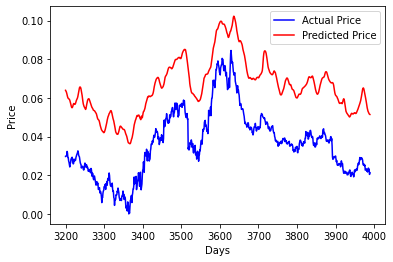

In [316]:
plot_graph(final_df)

In [317]:
final_df.tail(30)

,Date,open,high,low,close,adjclose,volume,RSI,SMA,EMA,WMA,MOM,future,Date,close_5,true_close_5,buy_profit,sell_profit
3960.0,2006-07-21,0.021384,0.021149,0.022865,0.023153,0.023153,0.499759,0.393419,0.024525,0.023061,0.023535,0.026207,0.025490,2006-07-21,0.055469,0.025490,0.002337,0
3961.0,2006-07-20,0.024522,0.023343,0.024262,0.022631,0.022631,0.533770,0.264868,0.024864,0.023234,0.023871,0.036384,0.026420,2006-07-20,0.055960,0.026420,0.003789,0
3962.0,2006-07-19,0.022918,0.022772,0.025840,0.024705,0.024705,0.359390,0.435485,0.025334,0.023811,0.024591,0.014122,0.027890,2006-07-19,0.056572,0.027890,0.003185,0
3963.0,2006-07-18,0.025468,0.024402,0.026380,0.025411,0.025411,0.360184,0.351922,0.025516,0.023935,0.024870,0.015063,0.029165,2006-07-18,0.057171,0.029165,0.003754,0
3964.0,2006-07-17,0.024582,0.024476,0.027429,0.026256,0.026256,0.241988,0.434536,0.025711,0.024289,0.025348,0.003211,0.028055,2006-07-17,0.057850,0.028055,0.001799,0
3965.0,2006-07-14,0.025568,0.024561,0.026533,0.025490,0.025490,0.317471,0.494788,0.025669,0.024496,0.025636,0.013711,0.028448,2006-07-14,0.058558,0.028448,0.002958,0
3966.0,2006-07-13,0.026203,0.025745,0.027974,0.026420,0.026420,0.290249,0.656202,0.025492,0.024605,0.025773,0.022481,0.028926,2006-07-13,0.059493,0.028926,0.002506,0
3967.0,2006-07-12,0.027602,0.026505,0.029710,0.027890,0.027890,0.202725,0.613142,0.025202,0.024418,0.025597,0.016133,0.028624,2006-07-12,0.060655,0.028624,0.000735,0
3968.0,2006-07-11,0.026983,0.026904,0.029062,0.029165,0.029165,0.248903,0.731041,0.024993,0.024332,0.025499,0.028382,0.028928,2006-07-11,0.061977,0.028928,-0.000237,0
3969.0,2006-07-10,0.027836,0.026935,0.029649,0.028055,0.028055,0.182325,0.800091,0.024626,0.024031,0.025175,0.033584,0.028253,2006-07-10,0.063300,0.028253,0.000197,0


In [318]:
final_df.set_index('Date',inplace=True)

In [ ]:
pd.set_option('display.max_rows',None)
final_df

In [320]:
final_df.to_csv('final_df1.csv')

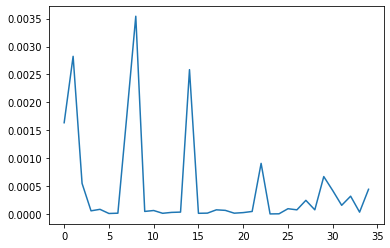

In [321]:
plt.plot(history.history['val_loss'])